## Problem Statement:
Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings as war
war.filterwarnings('ignore')

import re

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv')
df.head()   

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


#### Data Dictionary:

- ‘Unnamed 0’- Index of the dataset
- Email_hash- Anonymised Personal Identifiable Information (PII)
- Company_hash- Current employer of the learner
- orgyear- Employment start date
- CTC- Current CTC
- Job_position- Job profile in the company
- CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)

## Exploration and Pre-processing

In [3]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


## Missing Values

In [5]:
df.isnull().sum()

Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

- There are lot of null values in Job position,org year and company column

#### Job Position

In [6]:
df['job_position'].value_counts()

Backend Engineer             43554
FullStack Engineer           24717
Other                        18071
Frontend Engineer            10417
Engineering Leadership        6870
                             ...  
Software Developer - PL10        1
Staff Consultant                 1
Power platform Developer         1
Assisatnt System Engineer        1
Area Operations Manager          1
Name: job_position, Length: 1017, dtype: int64

In [7]:
df['job_position'].nunique()

1017

In [8]:
df_job_count = df['job_position'].value_counts().reset_index()
df_job_count.rename(columns={'index':'position', 'job_position':'count'},inplace=True)

In [9]:
df_job_count[df_job_count['count'] == 1]

,position,count
247,Analyst consultant,1
248,Software Engineer Associate,1
249,IaaS Engineer,1
250,Customer service executive,1
251,Software Development Engineer IV,1
...,...,...
1012,Software Developer - PL10,1
1013,Staff Consultant,1
1014,Power platform Developer,1
1015,Assisatnt System Engineer,1


In [10]:
#Some of the popular Job Title
df_job_count[df_job_count['count'] > 100]

,position,count
0,Backend Engineer,43554
1,FullStack Engineer,24717
2,Other,18071
3,Frontend Engineer,10417
4,Engineering Leadership,6870
5,QA Engineer,6587
6,Data Scientist,5368
7,Android Engineer,5357
8,SDET,4967
9,Devops Engineer,4612


Below are some of the apparaches to impute the null values for Job Position feature. 

1. Since 'Other' is a popular job title and we have to impute some values for our missing values, might as well go with other. 
2. The other apporach will be based on completely treat these values as a separate category. 
3. Use KNN Imputer (To use KNN Imputer for categorical values we need to encode these values to numerical first. In this case target encoding should work)

In [11]:
df[df['job_position'] == 'Other']['ctc'].describe()

count    1.807100e+04
mean     3.973584e+06
std      2.087977e+07
min      2.400000e+01
25%      4.000000e+05
50%      6.600000e+05
75%      1.210000e+06
max      2.000000e+08
Name: ctc, dtype: float64

In [12]:
df[df['job_position'].isnull()]['ctc'].describe()

count    5.256200e+04
mean     1.993828e+06
std      1.157060e+07
min      6.000000e+00
25%      5.000000e+05
50%      8.199990e+05
75%      1.500000e+06
max      1.000150e+09
Name: ctc, dtype: float64

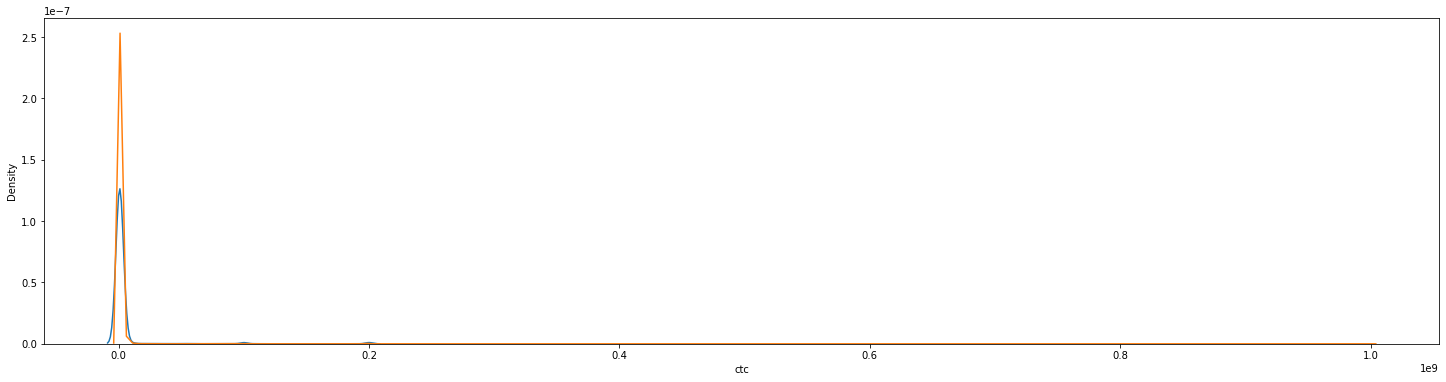

In [13]:
plt.figure(figsize=(25,6))
sns.distplot(df[df['job_position'] == 'Other']['ctc'],hist=False)
sns.distplot(df[df['job_position'].isnull()]['ctc'], hist= False)
plt.show()


In [14]:
df[df['job_position'] == 'Other']['company_hash'].value_counts()

nvnv wgzohrnvzwj otqcxwto    1058
xzegojo                       866
eqtoytq                       618
wgszxkvzn                     499
fxuqg rxbxnta                 420
                             ... 
vobr                            1
oxzwrho                         1
vxmttn ojontbo ucn rna          1
onqvfmtqqj xzegntwy             1
ftmtzsvst                       1
Name: company_hash, Length: 6083, dtype: int64

In [15]:
df[df['job_position'].isnull()]['company_hash'].value_counts()

nvnv wgzohrnvzwj otqcxwto          3028
xzegojo                            1937
zgn vuurxwvmrt vwwghzn             1380
wgszxkvzn                          1138
zgn vuurxwvmrt                     1064
                                   ... 
egqmto ntwyzgojo                      1
axwt vwvatbj                          1
uxgzttq ogrhnxgzo                     1
athnowyt ntrtpgb axsxnvr rvmo         1
oxwqvbv xzegntwy ucn rna zvsuhq       1
Name: company_hash, Length: 12310, dtype: int64

In [16]:
df[(df['company_hash'] == 'nvnv wgzohrnvzwj otqcxwto') & df['job_position'].isin(['Other',np.NaN])]

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
337,337,nvnv wgzohrnvzwj otqcxwto,b44191ed851a1dff51ae2cf2a393fc6799d045de7c0b01...,2018.0,440000,Other,2021.0
457,457,nvnv wgzohrnvzwj otqcxwto,717718247f219883fbb9158d11274e033130973fa40dbe...,2015.0,870000,Other,2020.0
507,507,nvnv wgzohrnvzwj otqcxwto,bca52d2d543819b12a99e977b790449277dfe8aebb487f...,2020.0,670000,NaN,2020.0
572,572,nvnv wgzohrnvzwj otqcxwto,6cf36267e3c4454dd4fd6ac7da284863529d721eee847f...,2019.0,300000,NaN,2021.0
634,634,nvnv wgzohrnvzwj otqcxwto,8d9a9bd7f4e3b5b3010ffb2afc1f19ceb39f8324214657...,2015.0,600000,Other,2020.0
...,...,...,...,...,...,...,...
205526,206606,nvnv wgzohrnvzwj otqcxwto,f4d553425ea2e09ec720a4527a51fda7dfdb56c0edee95...,2012.0,580000,NaN,2016.0
205609,206689,nvnv wgzohrnvzwj otqcxwto,c045760766c2b3025998099c8d86422c1a7dba37e3459e...,2020.0,330000,NaN,2020.0
205755,206835,nvnv wgzohrnvzwj otqcxwto,b4e3ab7d11b8b107b3048ada94e2ff18e10755691be6c8...,2019.0,740000,NaN,2021.0
205781,206861,nvnv wgzohrnvzwj otqcxwto,9c7572369588ff6c58339ef315b446a039a44ac9a15cbf...,2019.0,672000,NaN,2019.0


In [17]:
# Imputing all Null values as 'None' which is a separate category as 

df['job_position'].fillna('None',inplace=True)

Removing any special characters from 

In [18]:
def job_label(x):
    """ Function to return the clean data"""
    return re.sub('[^A-Za-z0-9 ]+', '', x)

In [19]:
df['job_position'].fillna('None',inplace=True)

In [20]:
df.isnull().sum()

Unnamed: 0           0
company_hash        44
email_hash           0
orgyear             86
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

#### Company Level Exploration

In [21]:
df['company_hash'].value_counts()

nvnv wgzohrnvzwj otqcxwto           8337
xzegojo                             5381
vbvkgz                              3481
zgn vuurxwvmrt vwwghzn              3411
wgszxkvzn                           3240
                                    ... 
uyx tahwvnxgz ucn rna                  1
ertdnqvat xzaxv uqxcvnt rna            1
mhjgsg                                 1
lggsrt xzegntwy otqcxwto ucn rna       1
lubgqsvz bhbmvx                        1
Name: company_hash, Length: 37299, dtype: int64

In [22]:
df.isnull().sum()

Unnamed: 0           0
company_hash        44
email_hash           0
orgyear             86
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

In [23]:
df[df['company_hash'].isnull()]

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
1115,1115,NaN,8fe09b732fe2e5b66c14904fd02ff89fb54f458465ac1e...,2022.0,66600000,None,2020.0
2400,2400,NaN,1074b55f02e6fc88596db85854e057c98cb53c038e0d7f...,2018.0,250000,Other,2019.0
3277,3277,NaN,66263f4942b046c67ae6e2570e7825c03792631a0b13f1...,2018.0,500000,Other,2019.0
4205,4205,NaN,6eb55d779699a2ea94f340ab7a58c8ec505e38bbb41214...,2018.0,600000,None,2020.0
4596,4597,NaN,18813fe2a50a45cc02c5b3871c676bd147c80ff0327ee9...,2020.0,300000,None,2021.0
11753,11761,NaN,ea4f735b9357e8086a42bacc1f64b18e98c3dd1ad81f60...,2018.0,300000,None,2021.0
14739,14748,NaN,b4a56d1199bc569aabd30cba8ea7a86fbddc85211453ba...,2013.0,1600000,None,2021.0
18853,18865,NaN,07a60d6e853852471b0963b78a0a3074532572a2580864...,2017.0,700000,FullStack Engineer,2021.0
19466,19478,NaN,07a60d6e853852471b0963b78a0a3074532572a2580864...,2017.0,700000,None,2021.0
22846,22864,NaN,bdce6736cc1d55a909a46aed9e0bfdcd7cd523bfcf9b63...,2010.0,2000000,None,2020.0


In [24]:
df['company_hash'].fillna('Others',inplace=True)

In [25]:
df['company_hash'].value_counts()

nvnv wgzohrnvzwj otqcxwto        8337
xzegojo                          5381
vbvkgz                           3481
zgn vuurxwvmrt vwwghzn           3411
wgszxkvzn                        3240
                                 ... 
ctrgkxgz ntwyzgrgsxto ucn rna       1
uyx tahwvnxgz ucn rna               1
ertdnqvat xzaxv uqxcvnt rna         1
mhjgsg                              1
lubgqsvz bhbmvx                     1
Name: company_hash, Length: 37300, dtype: int64

In [26]:
df.isnull().sum()

Unnamed: 0           0
company_hash         0
email_hash           0
orgyear             86
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

#### Organizational Year

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205843 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      205843 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [28]:
df['orgyear'].value_counts()

2018.0    25256
2019.0    23427
2017.0    23239
2016.0    23043
2015.0    20610
          ...  
1981.0        1
1972.0        1
208.0         1
4.0           1
1900.0        1
Name: orgyear, Length: 77, dtype: int64

In [29]:
# df['orgyear'].fillna(2018.0,inplace=True)
# df['orgyear'] = df['orgyear'].astype('int64')

In [30]:
# df[(df['orgyear'] >= 0) & (df['orgyear'] <= 1900)]['orgyear'].value_counts()

These rows doesn't seem to right. We need to check further before dropping them

In [31]:
# df[(df['orgyear'] >= 0) & (df['orgyear'] <= 1900)]['company_hash'].value_counts()

In [32]:
# df[(df['orgyear'] >= 0) & (df['orgyear'] <= 1900)]['job_position'].value_counts()

In [33]:
# df[(df['orgyear'] >= 0) & (df['orgyear'] <= 1900)]['ctc_updated_year'].value_counts()

In [34]:
df.isnull().sum()

Unnamed: 0           0
company_hash         0
email_hash           0
orgyear             86
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

In [35]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df['orgyear'] = imputer.fit_transform(np.array(df['orgyear']).reshape(-1,1))

In [36]:
df.isnull().sum()

Unnamed: 0          0
company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [37]:
df['orgyear'] = df['orgyear'].astype('int')
df['orgyear'].value_counts()

2018    25256
2019    23427
2017    23239
2016    23043
2015    20610
        ...  
1981        1
200         1
201         1
208         1
206         1
Name: orgyear, Length: 77, dtype: int64

All null values are sorted. Let perform a certain level of exploration

## Outliers Removal

<AxesSubplot:xlabel='ctc', ylabel='Density'>

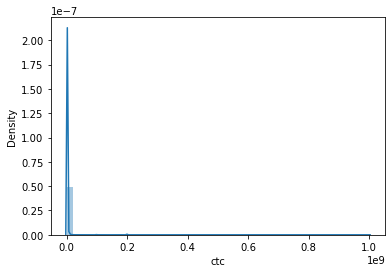

In [38]:
#Before Outlier Removal
sns.distplot(df['ctc'])

<AxesSubplot:xlabel='ctc_updated_year', ylabel='ctc'>

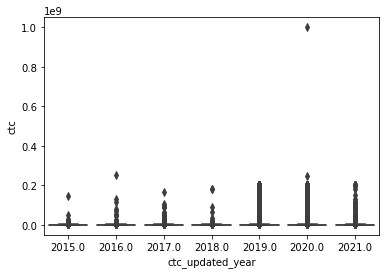

In [40]:
sns.boxplot(x = df['ctc_updated_year'].astype('O'), y = df['ctc'])

In [41]:
# Lets try the IQR Method. 

Q1 = df['ctc'].quantile(0.25)
Q3 = df['ctc'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df  = df[(df['ctc'] > lower_bound) & (df['ctc'] < upper_bound)]

<AxesSubplot:xlabel='ctc', ylabel='Density'>

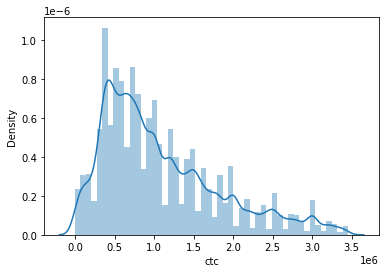

In [42]:
#After outlier removal
sns.distplot(df['ctc'])

<AxesSubplot:xlabel='ctc_updated_year', ylabel='ctc'>

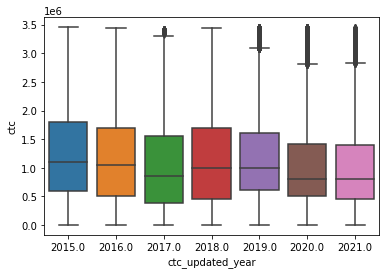

In [43]:
sns.boxplot(x = df['ctc_updated_year'].astype('O'), y = df['ctc'])

## Detail Analysis and Feature Engineering 

In [44]:
df['ctc_updated_year'] = df['ctc_updated_year'].astype('int64')

In [45]:
df['YOE'] = df['ctc_updated_year'] - df['orgyear']

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192716 entries, 0 to 205842
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        192716 non-null  int64 
 1   company_hash      192716 non-null  object
 2   email_hash        192716 non-null  object
 3   orgyear           192716 non-null  int32 
 4   ctc               192716 non-null  int64 
 5   job_position      192716 non-null  object
 6   ctc_updated_year  192716 non-null  int64 
 7   YOE               192716 non-null  int64 
dtypes: int32(1), int64(4), object(3)
memory usage: 16.5+ MB


In [47]:
#Filtering out rows where YOE is negative i.e. Employee got CTC update  before joining the Organization
df = df[~(df['YOE'] < 0)]

In [48]:
# Dropping the Unamed Column. 

df.drop(columns='Unnamed: 0', axis=1,inplace=True)

In [49]:
# Five Point summary of the CTC
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df['ctc'].describe()

count    184541.000
mean    1086703.282
std      750719.670
min           2.000
25%      500000.000
50%      900000.000
75%     1500000.000
max     3454500.000
Name: ctc, dtype: float64

In [51]:
# Max CTC
df[df['ctc'] == df['ctc'].max()]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE
126613,vbvkgz,bd2b42f4aa306efb27219d09aa429f6f3166613c36c317...,2014,3454500,Backend Engineer,2015,1
204063,vbvkgz,bd2b42f4aa306efb27219d09aa429f6f3166613c36c317...,2014,3454500,FullStack Engineer,2015,1


In [52]:
# Max CTC
df[df['ctc'] == df['ctc'].min()]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE
135435,xzntqcxtfmxn,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,2014,2,Backend Engineer,2019,5


There are outliers ofcourse...

In [53]:
df_company_YOE_agg = df[['company_hash','YOE','ctc']].groupby(by=['company_hash','YOE']).mean().reset_index()
df_company_YOE_agg.rename(columns={'ctc':'mean_ctc_by_company_YOE'},inplace=True)
df_company_YOE_agg

,company_hash,YOE,mean_ctc_by_company_YOE
0,0,0,100000.000
1,0000,3,300000.000
2,01 ojztqsj,3,270000.000
3,01 ojztqsj,8,830000.000
4,05mz exzytvrny uqxcvnt rxbxnta,2,1100000.000
...,...,...,...
60692,zz,7,1370000.000
60693,zz,12,500000.000
60694,zzb ztdnstz vacxogqj ucn rna,4,600000.000
60695,zzgato,3,130000.000


In [54]:
df_company_YOE_agg[df_company_YOE_agg['company_hash'] == 'xmb']

,company_hash,YOE,mean_ctc_by_company_YOE
52924,xmb,0,921764.686
52925,xmb,1,724027.523
52926,xmb,2,787762.463
52927,xmb,3,761515.724
52928,xmb,4,817814.423
52929,xmb,5,1059696.949
52930,xmb,6,1023554.245
52931,xmb,7,1071701.092
52932,xmb,8,1225555.511
52933,xmb,9,1406170.213


In [55]:
df[(df['company_hash'] == 'xmb') & (df['YOE'] == 10)]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE
14145,xmb,09fe72274cdac08c225e518014adaac4c1b0fbc04afb6b...,2011,1700000,None,2021,10
20525,xmb,0c089525f3291d982e0b0ac6d10cdd51db673b507052b2...,2011,1700000,None,2021,10
26914,xmb,09fe72274cdac08c225e518014adaac4c1b0fbc04afb6b...,2011,1700000,Backend Engineer,2021,10
26992,xmb,09fe72274cdac08c225e518014adaac4c1b0fbc04afb6b...,2011,1700000,Senior Staff Software Engineer,2021,10
31762,xmb,636eb20896ae85cfdb238b27ce18953eaa3cabc81d25f0...,2011,1700000,None,2021,10
34871,xmb,7eed1e6f4baf48dd7d3fdcb3d3399d662a0a5c51478521...,2011,1100000,None,2021,10
35696,xmb,7eed1e6f4baf48dd7d3fdcb3d3399d662a0a5c51478521...,2011,1100000,Data Scientist,2021,10
39608,xmb,8ecfdffaadcd3dfcf3e5a8022cf123e22c3938c46c3559...,2009,1200000,Backend Engineer,2019,10
48844,xmb,fe6b44fc8d4ed82cf6cb6903f1583bd2e62641e5996cad...,2011,1600000,Backend Architect,2021,10
61004,xmb,0c089525f3291d982e0b0ac6d10cdd51db673b507052b2...,2011,1700000,FullStack Engineer,2021,10


In [56]:
df = pd.merge(df,df_company_YOE_agg, how = 'outer', on =['company_hash','YOE'])
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,mean_ctc_by_company_YOE
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,4,942500.000
1,atrgxnnt xzaxv,b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef...,2014,1000000,Backend Engineer,2018,4,942500.000
2,atrgxnnt xzaxv,0d2f25432591093f5907a8681d600f869bbe7c2ae39cd7...,2017,600000,Android Engineer,2021,4,942500.000
3,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014,1070000,Other,2018,4,942500.000
4,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,1,803234.000


In [57]:
df[(df['company_hash'] == 'xmb') & (df['YOE'] == 10)]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,mean_ctc_by_company_YOE
88346,xmb,09fe72274cdac08c225e518014adaac4c1b0fbc04afb6b...,2011,1700000,None,2021,10,1518260.870
88347,xmb,0c089525f3291d982e0b0ac6d10cdd51db673b507052b2...,2011,1700000,None,2021,10,1518260.870
88348,xmb,09fe72274cdac08c225e518014adaac4c1b0fbc04afb6b...,2011,1700000,Backend Engineer,2021,10,1518260.870
88349,xmb,09fe72274cdac08c225e518014adaac4c1b0fbc04afb6b...,2011,1700000,Senior Staff Software Engineer,2021,10,1518260.870
88350,xmb,636eb20896ae85cfdb238b27ce18953eaa3cabc81d25f0...,2011,1700000,None,2021,10,1518260.870
88351,xmb,7eed1e6f4baf48dd7d3fdcb3d3399d662a0a5c51478521...,2011,1100000,None,2021,10,1518260.870
88352,xmb,7eed1e6f4baf48dd7d3fdcb3d3399d662a0a5c51478521...,2011,1100000,Data Scientist,2021,10,1518260.870
88353,xmb,8ecfdffaadcd3dfcf3e5a8022cf123e22c3938c46c3559...,2009,1200000,Backend Engineer,2019,10,1518260.870
88354,xmb,fe6b44fc8d4ed82cf6cb6903f1583bd2e62641e5996cad...,2011,1600000,Backend Architect,2021,10,1518260.870
88355,xmb,0c089525f3291d982e0b0ac6d10cdd51db673b507052b2...,2011,1700000,FullStack Engineer,2021,10,1518260.870


In [58]:
def label_by_company_yoe(df):
    if df['ctc'] > df['mean_ctc_by_company_YOE']:
        return 1
    elif ((df['ctc'] > (df['mean_ctc_by_company_YOE'] * 0.50)) and (df['ctc'] < df['mean_ctc_by_company_YOE'])):
        return 2
    else:
        return 3
        

In [59]:
df['label_by_company_yoe'] = df.apply(label_by_company_yoe, axis=1)

In [60]:
df[(df['company_hash'] == 'xmb') & (df['YOE'] == 10)]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,mean_ctc_by_company_YOE,label_by_company_yoe
88346,xmb,09fe72274cdac08c225e518014adaac4c1b0fbc04afb6b...,2011,1700000,None,2021,10,1518260.870,1
88347,xmb,0c089525f3291d982e0b0ac6d10cdd51db673b507052b2...,2011,1700000,None,2021,10,1518260.870,1
88348,xmb,09fe72274cdac08c225e518014adaac4c1b0fbc04afb6b...,2011,1700000,Backend Engineer,2021,10,1518260.870,1
88349,xmb,09fe72274cdac08c225e518014adaac4c1b0fbc04afb6b...,2011,1700000,Senior Staff Software Engineer,2021,10,1518260.870,1
88350,xmb,636eb20896ae85cfdb238b27ce18953eaa3cabc81d25f0...,2011,1700000,None,2021,10,1518260.870,1
88351,xmb,7eed1e6f4baf48dd7d3fdcb3d3399d662a0a5c51478521...,2011,1100000,None,2021,10,1518260.870,2
88352,xmb,7eed1e6f4baf48dd7d3fdcb3d3399d662a0a5c51478521...,2011,1100000,Data Scientist,2021,10,1518260.870,2
88353,xmb,8ecfdffaadcd3dfcf3e5a8022cf123e22c3938c46c3559...,2009,1200000,Backend Engineer,2019,10,1518260.870,2
88354,xmb,fe6b44fc8d4ed82cf6cb6903f1583bd2e62641e5996cad...,2011,1600000,Backend Architect,2021,10,1518260.870,1
88355,xmb,0c089525f3291d982e0b0ac6d10cdd51db673b507052b2...,2011,1700000,FullStack Engineer,2021,10,1518260.870,1


In [61]:
df['label_by_company_yoe'].value_counts()

3    68900
2    59719
1    55922
Name: label_by_company_yoe, dtype: int64

In [62]:
df_company_job_agg = df[['company_hash','job_position','ctc']].groupby(by=['company_hash','job_position']).mean().reset_index()
df_company_job_agg.rename(columns={'ctc':'mean_ctc_by_company_job'},inplace=True)
df_company_job_agg

,company_hash,job_position,mean_ctc_by_company_job
0,0,None,100000.000
1,0,Other,100000.000
2,0000,Other,300000.000
3,01 ojztqsj,Android Engineer,270000.000
4,01 ojztqsj,Frontend Engineer,830000.000
...,...,...,...
66260,zz,Other,1370000.000
66261,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer,600000.000
66262,zzb ztdnstz vacxogqj ucn rna,None,600000.000
66263,zzgato,None,130000.000


In [63]:
df = pd.merge(df,df_company_job_agg, how = 'outer', on =['company_hash','job_position'])
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,mean_ctc_by_company_YOE,label_by_company_yoe,mean_ctc_by_company_job
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,4,942500.000,1,1085000.000
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014,1070000,Other,2018,4,942500.000,1,1085000.000
2,atrgxnnt xzaxv,b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef...,2014,1000000,Backend Engineer,2018,4,942500.000,1,750000.000
3,atrgxnnt xzaxv,a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475...,2019,500000,Backend Engineer,2020,1,500000.000,3,750000.000
4,atrgxnnt xzaxv,0d2f25432591093f5907a8681d600f869bbe7c2ae39cd7...,2017,600000,Android Engineer,2021,4,942500.000,2,600000.000


In [64]:
def label_by_company_job(df):
    if df['ctc'] > df['mean_ctc_by_company_job']:
        return 1
    elif ((df['ctc'] > (df['mean_ctc_by_company_job'] * 0.50)) and (df['ctc'] < df['mean_ctc_by_company_job'])):
        return 2
    else:
        return 3
        

In [65]:
df['label_by_company_job'] = df.apply(label_by_company_job,axis=1)

In [66]:
df[(df['company_hash'] == 'xmb') & (df['YOE'] == 10)]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,mean_ctc_by_company_YOE,label_by_company_yoe,mean_ctc_by_company_job,label_by_company_job
66974,xmb,7f8f36b1a0fe2c4dcf4dc95580e7ed3b9bf573cf4d0ae7...,2009,2500000,Engineering Leadership,2019,10,1518260.870,1,1943055.556,1
67014,xmb,9550c0c9341dbae5da8ecee4c1d573cb1c0f8742cdb8f6...,2011,1800000,Support Engineer,2021,10,1518260.870,1,596636.273,1
67141,xmb,09fe72274cdac08c225e518014adaac4c1b0fbc04afb6b...,2011,1700000,Backend Engineer,2021,10,1518260.870,1,1041358.614,1
67142,xmb,8ecfdffaadcd3dfcf3e5a8022cf123e22c3938c46c3559...,2009,1200000,Backend Engineer,2019,10,1518260.870,2,1041358.614,1
67460,xmb,09fe72274cdac08c225e518014adaac4c1b0fbc04afb6b...,2011,1700000,None,2021,10,1518260.870,1,1002004.928,1
67461,xmb,0c089525f3291d982e0b0ac6d10cdd51db673b507052b2...,2011,1700000,None,2021,10,1518260.870,1,1002004.928,1
67462,xmb,636eb20896ae85cfdb238b27ce18953eaa3cabc81d25f0...,2011,1700000,None,2021,10,1518260.870,1,1002004.928,1
67463,xmb,7eed1e6f4baf48dd7d3fdcb3d3399d662a0a5c51478521...,2011,1100000,None,2021,10,1518260.870,2,1002004.928,1
67464,xmb,a3f498b2be2f9466ba89f68f5a2327174c17f1091fa86f...,2011,2400000,None,2021,10,1518260.870,1,1002004.928,1
67465,xmb,46b3ec449d46c7ab43b7d8f6e809bb07837b1e6d1e0920...,2011,1000000,None,2021,10,1518260.870,2,1002004.928,2


In [67]:
df_company_agg = df[['company_hash','ctc']].groupby(by=['company_hash']).mean().reset_index()
df_company_agg.rename(columns={'ctc':'mean_ctc_by_company'},inplace=True)
df_company_agg

,company_hash,mean_ctc_by_company
0,0,100000.000
1,0000,300000.000
2,01 ojztqsj,550000.000
3,05mz exzytvrny uqxcvnt rxbxnta,1100000.000
4,1,100000.000
...,...,...
34698,zyvzwt wgzohrnxzs tzsxzttqo,940000.000
34699,zz,935000.000
34700,zzb ztdnstz vacxogqj ucn rna,600000.000
34701,zzgato,130000.000


In [68]:
df = pd.merge(df,df_company_agg, how = 'outer', on =['company_hash'])
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,mean_ctc_by_company_YOE,label_by_company_yoe,mean_ctc_by_company_job,label_by_company_job,mean_ctc_by_company
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,4,942500.000,1,1085000.000,1,1115666.667
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014,1070000,Other,2018,4,942500.000,1,1085000.000,2,1115666.667
2,atrgxnnt xzaxv,b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef...,2014,1000000,Backend Engineer,2018,4,942500.000,1,750000.000,1,1115666.667
3,atrgxnnt xzaxv,a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475...,2019,500000,Backend Engineer,2020,1,500000.000,3,750000.000,2,1115666.667
4,atrgxnnt xzaxv,0d2f25432591093f5907a8681d600f869bbe7c2ae39cd7...,2017,600000,Android Engineer,2021,4,942500.000,2,600000.000,3,1115666.667


In [69]:
def label_by_company(df):
    if df['ctc'] > df['mean_ctc_by_company']:
        return 1
    elif ((df['ctc'] > (df['mean_ctc_by_company'] * 0.50)) and (df['ctc'] < df['mean_ctc_by_company'])):
        return 2
    else:
        return 3
        

In [70]:
df['label_by_company']  = df.apply(label_by_company,axis=1)

In [71]:
df[(df['company_hash'] == 'xmb') & (df['YOE'] == 10) & (df['job_position'] == 'Engineering Leadership')]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,mean_ctc_by_company_YOE,label_by_company_yoe,mean_ctc_by_company_job,label_by_company_job,mean_ctc_by_company,label_by_company
74211,xmb,7f8f36b1a0fe2c4dcf4dc95580e7ed3b9bf573cf4d0ae7...,2009,2500000,Engineering Leadership,2019,10,1518260.870,1,1943055.556,1,1043995.492,1


In [72]:
df[(df['company_hash'] == 'xmb') & (df['job_position'] == 'Engineering Leadership')].sort_values(by='ctc',ascending=False)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,mean_ctc_by_company_YOE,label_by_company_yoe,mean_ctc_by_company_job,label_by_company_job,mean_ctc_by_company,label_by_company
74218,xmb,ebced6a42a1e75387f936ad967c1ee0801d5f70df325d6...,1999,3200000,Engineering Leadership,2019,20,2953333.333,1,1943055.556,1,1043995.492,1
74219,xmb,2dc4be0a57b71cbccb269296343efae7b366c977d3268d...,1999,3160000,Engineering Leadership,2019,20,2953333.333,1,1943055.556,1,1043995.492,1
74220,xmb,04e07e8662d683fd3d3515bf114f208c513916574719c5...,2004,3100000,Engineering Leadership,2019,15,1751000.000,1,1943055.556,1,1043995.492,1
74210,xmb,5355c5ed76a601159b20b3c52870d2d505ee02ed6bcceb...,2009,3000000,Engineering Leadership,2021,12,1620208.333,1,1943055.556,1,1043995.492,1
74215,xmb,a2ac00ae5ee394e6aabfc97fff0acfedd253295da72a39...,2005,2700000,Engineering Leadership,2019,14,1620882.353,1,1943055.556,1,1043995.492,1
74217,xmb,d2f5e13b29df4249fa790b21dd4645a2c845a2940f0387...,1997,2600000,Engineering Leadership,2019,22,2937500.000,2,1943055.556,1,1043995.492,1
74209,xmb,40475010ea22dfaabc904f8f9b014c388bc7312bceedd4...,2007,2500000,Engineering Leadership,2019,12,1620208.333,1,1943055.556,1,1043995.492,1
74211,xmb,7f8f36b1a0fe2c4dcf4dc95580e7ed3b9bf573cf4d0ae7...,2009,2500000,Engineering Leadership,2019,10,1518260.870,1,1943055.556,1,1043995.492,1
74214,xmb,b7682d2eee5794ffb3943c9345865530fae84ad798615a...,2007,2250000,Engineering Leadership,2021,14,1620882.353,1,1943055.556,1,1043995.492,1
74208,xmb,bed941e619ff1a9579f831901c72af9b4a5fc99ad6da9f...,2015,1900000,Engineering Leadership,2019,4,817814.423,1,1943055.556,2,1043995.492,1


In [73]:
# Analysis

In [74]:
# Top 10 Tier 1 employess by CTC
df[df['label_by_company'] == 1].sort_values(by='ctc',ascending=False).head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,mean_ctc_by_company_YOE,label_by_company_yoe,mean_ctc_by_company_job,label_by_company_job,mean_ctc_by_company,label_by_company
26896,vbvkgz,bd2b42f4aa306efb27219d09aa429f6f3166613c36c317...,2014,3454500,FullStack Engineer,2015,1,1648775.301,1,1830547.938,1,1527502.612,1
26264,vbvkgz,bd2b42f4aa306efb27219d09aa429f6f3166613c36c317...,2014,3454500,Backend Engineer,2015,1,1648775.301,1,1831909.066,1,1527502.612,1
115508,ihvrjo,bd41c69af90e2f65ba5397c10b68058017eef385c2fdf8...,2008,3450000,Engineering Leadership,2019,11,2816666.667,1,3450000.000,3,1583708.312,1
26474,vbvkgz,97dbfe314751f2794dd9e5c68f36a3ec987a40919b18f2...,2017,3450000,Backend Engineer,2019,2,1614859.548,1,1831909.066,1,1527502.612,1
87500,bxwqgogen,963791cbc30c869e8914c149005c941a5ee8015c5b0a43...,2013,3450000,Backend Engineer,2019,6,2188008.538,1,2044751.010,1,2023968.354,1
13500,hmtq,7b6995298e4316fdec117300a3b5c4ee41afa066e6f684...,2017,3450000,FullStack Engineer,2020,3,2041040.000,1,2516666.667,1,1937928.571,1
181571,uxzs xatznxnj,4704e59f7a8fc0a2a37532bf57418a86c69496045ad05c...,2016,3450000,Backend Engineer,2021,5,2725000.000,1,2725000.000,1,2725000.000,1
28280,ouqxzprq,f76138433250670947690139ab2710d293fa96a1662d93...,2017,3450000,Backend Engineer,2019,2,1981290.323,1,2275714.286,1,1898893.939,1
106513,ogwxtnt stztqvrt srgmvr ogrhnxgz wtznqt,794b3345a797c314ed952e9c28783d6b55cd71f9459fde...,2005,3450000,Engineering Leadership,2019,14,3116666.667,1,2571176.471,1,1681467.862,1
79259,evwnotn,55af1325cf6314b7e3d989479df33da402824804976d77...,2010,3450000,Engineering Leadership,2019,9,1455875.000,1,2894285.714,1,1125279.387,1


In [75]:
#Top 10 employess in xmb company with data science skills who are of class 1 employees (i.e. who are earning more than their peers in their niche)
df[(df['company_hash'] == 'xmb') & (df['job_position'].isin(['Data Analyst','Data Scientist','Data Specialist'])) & (df['label_by_company_job'] == 1)].sort_values(by='ctc',ascending=False).head(10)


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,mean_ctc_by_company_YOE,label_by_company_yoe,mean_ctc_by_company_job,label_by_company_job,mean_ctc_by_company,label_by_company
74751,xmb,d485c11c26c1a000aad751e67688d249c34b54d3fc82f9...,2017,2650000,Data Scientist,2019,2,787762.463,1,1336333.289,1,1043995.492,1
74766,xmb,0a60d39b0048838ec3036f2f91b078db8aa01cf6301eb0...,2014,2550000,Data Scientist,2019,5,1059696.949,1,1336333.289,1,1043995.492,1
74769,xmb,e83230447d690abc4517550520b484b646783fe723a011...,2007,2400000,Data Scientist,2019,12,1620208.333,1,1336333.289,1,1043995.492,1
74780,xmb,a3f498b2be2f9466ba89f68f5a2327174c17f1091fa86f...,2011,2400000,Data Scientist,2021,10,1518260.870,1,1336333.289,1,1043995.492,1
74760,xmb,63697da7e1d3dacb898bb766b93bf5a2e21b88703a6192...,2003,2380000,Data Scientist,2019,16,1672000.000,1,1336333.289,1,1043995.492,1
74746,xmb,63b9267eabf04c2069ec3d840cf043c2b42078d53aa180...,2018,2300000,Data Scientist,2020,2,787762.463,1,1336333.289,1,1043995.492,1
74742,xmb,3a9397afb2413acda670b4ed18f7c9ac89bd59b5e2e3de...,2015,2130000,Data Scientist,2021,6,1023554.245,1,1336333.289,1,1043995.492,1
74750,xmb,b5226ab5cb43c8831a0807eb9ff2796a15d531e3a6535a...,2016,2000000,Data Scientist,2018,2,787762.463,1,1336333.289,1,1043995.492,1
74763,xmb,58bc5db62c01e6e7548e1f3a4bf1e27affc8eb10a62edb...,2017,1900000,Data Scientist,2021,4,817814.423,1,1336333.289,1,1043995.492,1
74776,xmb,b42c5dd20fb6bb84e38d58a2371fcb9e66f90671e93956...,2011,1689999,Data Scientist,2019,8,1225555.511,1,1336333.289,1,1043995.492,1


In [76]:
#Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3
df[(df['company_hash'] == 'xmb') & (df['job_position'].isin(['Data Analyst','Data Scientist','Data Specialist'])) & (df['label_by_company_job'] == 3)].sort_values(by='ctc',ascending=True).head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,mean_ctc_by_company_YOE,label_by_company_yoe,mean_ctc_by_company_job,label_by_company_job,mean_ctc_by_company,label_by_company
75056,xmb,567297f93625531e97e765750b7118178dfd3f1025263e...,2018,300000,Data Analyst,2021,3,761515.724,3,627600.000,3,1043995.492,3
74747,xmb,f12543e31fb20dc03a5d6fe8452ba57e29dddba408e198...,2017,400000,Data Scientist,2019,2,787762.463,2,1336333.289,3,1043995.492,3
74749,xmb,c9f2f62a45bc039e00b50012847f8c2d24051c40c7de17...,2017,400000,Data Scientist,2019,2,787762.463,2,1336333.289,3,1043995.492,3
74774,xmb,3a9397afb2413acda670b4ed18f7c9ac89bd59b5e2e3de...,2015,500000,Data Scientist,2015,0,921764.686,2,1336333.289,3,1043995.492,3
75117,xmb,3a9397afb2413acda670b4ed18f7c9ac89bd59b5e2e3de...,2015,500000,Data Specialist,2015,0,921764.686,2,500000.000,3,1043995.492,3
74757,xmb,23cdc22473dcb2184253a5338c70d692a2fca16bb5e964...,2016,520000,Data Scientist,2019,3,761515.724,2,1336333.289,3,1043995.492,3
74744,xmb,372418d9337ffd12eb819df6d6684d9e93f0d8a378bb8e...,2014,600000,Data Scientist,2021,7,1071701.092,2,1336333.289,3,1043995.492,2
74748,xmb,6c25944c37b1c51492b56aa5c46b3939cb947754e8a273...,2019,600000,Data Scientist,2021,2,787762.463,2,1336333.289,3,1043995.492,2


In [77]:
# Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

df[df['label_by_company'] == 3].sort_values(by='ctc',ascending=True).head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,mean_ctc_by_company_YOE,label_by_company_yoe,mean_ctc_by_company_job,label_by_company_job,mean_ctc_by_company,label_by_company
92371,xzntqcxtfmxn,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,2014,2,Backend Engineer,2019,5,1478335.167,3,884736.947,3,1138177.774,3
92385,xzntqcxtfmxn,f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...,2013,6,None,2018,5,1478335.167,3,1128126.250,3,1138177.774,3
92384,xzntqcxtfmxn,23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...,2013,14,None,2018,5,1478335.167,3,1128126.250,3,1138177.774,3
181739,xm,b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...,2016,15,None,2018,2,15.000,3,15.000,3,15.000,3
152867,uqvpqxnx voogwxvnto,8786759b95d673466e94f62f1b15e4f8c6bd7de6164074...,2020,24,Other,2020,0,24.000,3,24.000,3,24.000,3
164061,ftm ongqt,512f761579fb116e215cabc9821c7f81153f0763e16018...,2016,25,Android Engineer,2018,2,25.000,3,25.000,3,25.000,3
178850,vcvzn sqghu,c411a6917058b50f44d7c62751be9b232155b23211de4c...,2013,300,Database Administrator,2019,6,300.000,3,300.000,3,300.000,3
161552,uqgmrtb ogrcxzs,edcfb902656b736e1f35863298706d9d34ee795b7ed85a...,2018,500,Co-founder,2019,1,500.000,3,500.000,3,500.000,3
39490,nvnv wgzohrnvzwj otqcxwto,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...,2012,600,Backend Engineer,2017,5,617281.221,3,577140.857,3,572304.959,3
63760,gjg,b995d7a2ae5c6f8497762ce04dc5c04ad6ec734d70802a...,2018,600,FullStack Engineer,2021,3,1518382.609,3,1330665.217,3,1421462.759,3


In [78]:
#Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X

df[(df['company_hash'] == 'xmb') & (df['job_position'].isin(['Data Analyst','Data Scientist','Data Specialist'])) & (df['YOE'].isin([5,6,7])) & (df['label_by_company_job'] == 1)].sort_values(by='ctc',ascending=False).head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,mean_ctc_by_company_YOE,label_by_company_yoe,mean_ctc_by_company_job,label_by_company_job,mean_ctc_by_company,label_by_company
74766,xmb,0a60d39b0048838ec3036f2f91b078db8aa01cf6301eb0...,2014,2550000,Data Scientist,2019,5,1059696.949,1,1336333.289,1,1043995.492,1
74742,xmb,3a9397afb2413acda670b4ed18f7c9ac89bd59b5e2e3de...,2015,2130000,Data Scientist,2021,6,1023554.245,1,1336333.289,1,1043995.492,1
74768,xmb,2a36f1e0ec025671f5fdd8b6894408c6316eca78e39c89...,2014,1650000,Data Scientist,2019,5,1059696.949,1,1336333.289,1,1043995.492,1
74765,xmb,0f9c8353cddf5dc35a87212ca39461978d5057b3e0e724...,2014,1510000,Data Scientist,2019,5,1059696.949,1,1336333.289,1,1043995.492,1
74745,xmb,1f683c59e2810aec6d11220463f4cc671b5857adf2d077...,2012,1400000,Data Scientist,2019,7,1071701.092,1,1336333.289,1,1043995.492,1
74767,xmb,0c8fd679f7090664ab60b2bf130f56321bbe8517d519db...,2014,1400000,Data Scientist,2019,5,1059696.949,1,1336333.289,1,1043995.492,1
75052,xmb,0cd440af132e911d4dd501f5546344a936d39f70763f54...,2014,1030000,Data Analyst,2021,7,1071701.092,2,627600.000,1,1043995.492,2
75053,xmb,69b883515c431520e494667b85c2cf1ba37e809fdb05da...,2014,850000,Data Analyst,2021,7,1071701.092,2,627600.000,1,1043995.492,2


In [79]:
# Top 10 companies (based on their CTC)

df[df['label_by_company'] == 1].sort_values(by='ctc',ascending=False).head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,mean_ctc_by_company_YOE,label_by_company_yoe,mean_ctc_by_company_job,label_by_company_job,mean_ctc_by_company,label_by_company
26896,vbvkgz,bd2b42f4aa306efb27219d09aa429f6f3166613c36c317...,2014,3454500,FullStack Engineer,2015,1,1648775.301,1,1830547.938,1,1527502.612,1
26264,vbvkgz,bd2b42f4aa306efb27219d09aa429f6f3166613c36c317...,2014,3454500,Backend Engineer,2015,1,1648775.301,1,1831909.066,1,1527502.612,1
115508,ihvrjo,bd41c69af90e2f65ba5397c10b68058017eef385c2fdf8...,2008,3450000,Engineering Leadership,2019,11,2816666.667,1,3450000.000,3,1583708.312,1
26474,vbvkgz,97dbfe314751f2794dd9e5c68f36a3ec987a40919b18f2...,2017,3450000,Backend Engineer,2019,2,1614859.548,1,1831909.066,1,1527502.612,1
87500,bxwqgogen,963791cbc30c869e8914c149005c941a5ee8015c5b0a43...,2013,3450000,Backend Engineer,2019,6,2188008.538,1,2044751.010,1,2023968.354,1
13500,hmtq,7b6995298e4316fdec117300a3b5c4ee41afa066e6f684...,2017,3450000,FullStack Engineer,2020,3,2041040.000,1,2516666.667,1,1937928.571,1
181571,uxzs xatznxnj,4704e59f7a8fc0a2a37532bf57418a86c69496045ad05c...,2016,3450000,Backend Engineer,2021,5,2725000.000,1,2725000.000,1,2725000.000,1
28280,ouqxzprq,f76138433250670947690139ab2710d293fa96a1662d93...,2017,3450000,Backend Engineer,2019,2,1981290.323,1,2275714.286,1,1898893.939,1
106513,ogwxtnt stztqvrt srgmvr ogrhnxgz wtznqt,794b3345a797c314ed952e9c28783d6b55cd71f9459fde...,2005,3450000,Engineering Leadership,2019,14,3116666.667,1,2571176.471,1,1681467.862,1
79259,evwnotn,55af1325cf6314b7e3d989479df33da402824804976d77...,2010,3450000,Engineering Leadership,2019,9,1455875.000,1,2894285.714,1,1125279.387,1


In [80]:
# Top 2 positions in every company (based on their CTC)

df_agg = df[df['label_by_company_job'] == 1].sort_values(by=['ctc'],ascending=False)
df_agg.sort_values(by=['company_hash'],ascending=True)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,mean_ctc_by_company_YOE,label_by_company_yoe,mean_ctc_by_company_job,label_by_company_job,mean_ctc_by_company,label_by_company
166091,1 jtvq,034ae72dd3b77497e96173751f8805d5314bc2363e30c2...,2018,1700000,Backend Engineer,2019,1,1180000.000,1,1180000.000,1,1180000.000,1
127162,10nxbto,2dde60f4a510b412ac4e8011e806282ecb181a51081751...,2019,410000,FullStack Engineer,2020,1,403333.333,1,405000.000,1,427500.000,2
124963,159 ogrhnxgzo,32b7af6a22321bae56df8b23ed279c1ec83098b2d42690...,2018,800000,None,2020,2,600000.000,1,650000.000,1,605000.000,1
124961,159 ogrhnxgzo,34899d76060c1f9885967e7b07557104a93d67690d5378...,2019,620000,Other,2019,0,620000.000,3,560000.000,1,605000.000,1
107852,1bs,a58fadbfbc00c007dfe6e5d5891f2dda013eb5cc66552a...,2014,1600000,FullStack Engineer,2021,7,1775000.000,2,1450000.000,1,1432903.226,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44408,zxztrtvuo,3879b9a1e356ed20363fffd6871207eb908b38c864a2db...,2017,1500000,FullStack Engineer,2019,2,923888.889,1,872571.429,1,994416.653,1
44404,zxztrtvuo,077a6b1aa5195410e497d0fb91fe2627db85d9b9879ec7...,2016,1200000,FullStack Engineer,2020,4,1131250.000,1,872571.429,1,994416.653,1
44402,zxztrtvuo,234f0f52e89b20231f5685551b865a08a5634189e1ffec...,2015,2500000,None,2021,6,1858333.333,1,803823.529,1,994416.653,1
44386,zxztrtvuo,cd4c94fca170e120bb7a9b3f46cb8f903247a52016d6fa...,2015,1200000,None,2019,4,1131250.000,1,803823.529,1,994416.653,1


## Data processing for Unsupervised clustering - Label encoding/ One- hot encoding, Standardization of data

In [81]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,mean_ctc_by_company_YOE,label_by_company_yoe,mean_ctc_by_company_job,label_by_company_job,mean_ctc_by_company,label_by_company
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,4,942500.000,1,1085000.000,1,1115666.667,2
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014,1070000,Other,2018,4,942500.000,1,1085000.000,2,1115666.667,2
2,atrgxnnt xzaxv,b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef...,2014,1000000,Backend Engineer,2018,4,942500.000,1,750000.000,1,1115666.667,2
3,atrgxnnt xzaxv,a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475...,2019,500000,Backend Engineer,2020,1,500000.000,3,750000.000,2,1115666.667,3
4,atrgxnnt xzaxv,0d2f25432591093f5907a8681d600f869bbe7c2ae39cd7...,2017,600000,Android Engineer,2021,4,942500.000,2,600000.000,3,1115666.667,2


In [82]:
df_clus = df.copy()

In [83]:
df_clus.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,mean_ctc_by_company_YOE,label_by_company_yoe,mean_ctc_by_company_job,label_by_company_job,mean_ctc_by_company,label_by_company
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,4,942500.000,1,1085000.000,1,1115666.667,2
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014,1070000,Other,2018,4,942500.000,1,1085000.000,2,1115666.667,2
2,atrgxnnt xzaxv,b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef...,2014,1000000,Backend Engineer,2018,4,942500.000,1,750000.000,1,1115666.667,2
3,atrgxnnt xzaxv,a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475...,2019,500000,Backend Engineer,2020,1,500000.000,3,750000.000,2,1115666.667,3
4,atrgxnnt xzaxv,0d2f25432591093f5907a8681d600f869bbe7c2ae39cd7...,2017,600000,Android Engineer,2021,4,942500.000,2,600000.000,3,1115666.667,2


In [84]:
import category_encoders as ce

encd = ce.TargetEncoder()

df_clus['company_hash'] = encd.fit_transform(df_clus['company_hash'],df_clus['ctc'])
df_clus['email_hash'] = encd.fit_transform(df_clus['email_hash'],df_clus['ctc'])
df_clus['job_position'] = encd.fit_transform(df_clus['job_position'],df_clus['ctc'])


In [85]:
df_clus['email_hash']

0        1096423.962
1        1086703.282
2        1086703.282
3         456381.856
4        1086703.282
             ...    
184536   1086703.282
184537   1086703.282
184538   1086703.282
184539   1086703.282
184540   1086703.282
Name: email_hash, Length: 184541, dtype: float64

In [86]:
df[df['company_hash'] == 'atrgxnnt xzaxv']['ctc'].mean()

1115666.6666666667

In [87]:
df[df['company_hash'] == 'atrgxnnt xzaxv']['mean_ctc_by_company'].unique()

array([1115666.66666667])

In [88]:
df_clus = df_clus[['company_hash','email_hash','job_position','orgyear','ctc_updated_year','YOE','ctc']]

In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_clus)
X=scaler.transform(df_clus)

In [90]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [91]:
y_pred

array([1, 2, 2, ..., 2, 2, 0])

In [92]:
##coordinates of the cluster centers
kmeans.cluster_centers_

array([[0.48355385, 0.42372337, 0.37155319, 0.99590264, 0.78518561,
        0.00345961, 0.62917303],
       [0.27619165, 0.26215549, 0.30681717, 0.99764777, 0.93397267,
        0.00215621, 0.20292985],
       [0.33089747, 0.29387361, 0.3282874 , 0.99656434, 0.57598982,
        0.00217684, 0.23442395]])

In [93]:
clusters = pd.DataFrame(X, columns=df_clus.columns)
clusters['label'] = kmeans.labels_
clusters.head(3)

,company_hash,email_hash,job_position,orgyear,ctc_updated_year,YOE,ctc,label
0,0.344,0.317,0.221,0.998,0.833,0.002,0.318,1
1,0.344,0.314,0.221,0.997,0.500,0.002,0.310,2
2,0.344,0.314,0.400,0.997,0.500,0.002,0.289,2


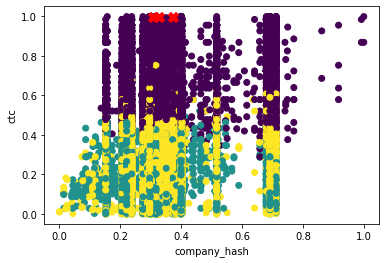

In [94]:
def viz_clusters(kmeans):
    plt.scatter(clusters['job_position'], clusters['ctc'], c=clusters['label'])
    plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], 
                color="red",
                marker="X",
                s=100)
    plt.xlabel('company_hash')
    plt.ylabel('ctc')
    
viz_clusters(kmeans)

In [95]:
clusters['label'].value_counts()

1    81282
2    59256
0    44003
Name: label, dtype: int64

In [96]:
df['label_by_company'].value_counts()

2    68226
1    64979
3    51336
Name: label_by_company, dtype: int64

<AxesSubplot:xlabel='ctc_updated_year', ylabel='ctc'>

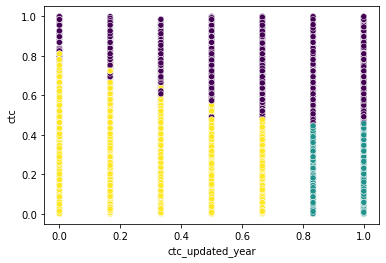

In [98]:
sns.scatterplot(clusters['ctc_updated_year'],clusters['ctc'], c=clusters['label'])

In [99]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,mean_ctc_by_company_YOE,label_by_company_yoe,mean_ctc_by_company_job,label_by_company_job,mean_ctc_by_company,label_by_company
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,4,942500.000,1,1085000.000,1,1115666.667,2
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014,1070000,Other,2018,4,942500.000,1,1085000.000,2,1115666.667,2
2,atrgxnnt xzaxv,b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef...,2014,1000000,Backend Engineer,2018,4,942500.000,1,750000.000,1,1115666.667,2
3,atrgxnnt xzaxv,a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475...,2019,500000,Backend Engineer,2020,1,500000.000,3,750000.000,2,1115666.667,3
4,atrgxnnt xzaxv,0d2f25432591093f5907a8681d600f869bbe7c2ae39cd7...,2017,600000,Android Engineer,2021,4,942500.000,2,600000.000,3,1115666.667,2


#### Elbow Method

In [100]:
wcss = []

for i in range(1,20):
    kmeans = KMeans(n_clusters = i, random_state= 42).fit(X)
    wcss.append(kmeans.inertia_)

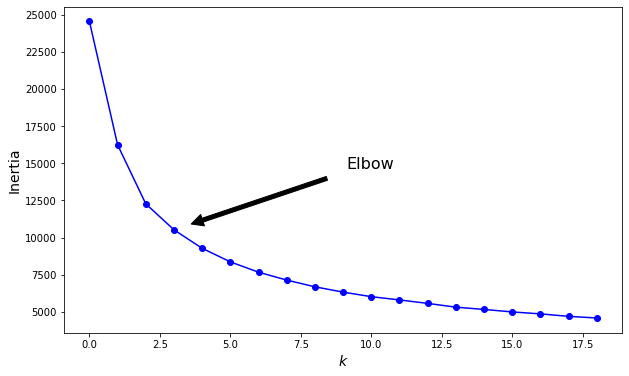

In [112]:
plt.figure(figsize=(10,6))
plt.plot(wcss,"bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, wcss[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

plt.show()

### Hierarchical Clustering

In [113]:
df_clus.head()

,company_hash,email_hash,job_position,orgyear,ctc_updated_year,YOE,ctc
0,1115656.954,1096423.962,835189.706,2016,2020,4,1100000
1,1115656.954,1086703.282,835189.706,2014,2018,4,1070000
2,1115656.954,1086703.282,1251585.613,2014,2018,4,1000000
3,1115656.954,456381.856,1251585.613,2019,2020,1,500000
4,1115656.954,1086703.282,1023539.927,2017,2021,4,600000


In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_clus)
X_hie = scaler.transform(df_clus)

In [115]:
scaled_df = pd.DataFrame(X_hie, columns=df_clus.columns, index=df_clus.index)

In [117]:
scaled_df.shape

(184541, 7)

In [125]:
scaled_df[:100]

,company_hash,email_hash,job_position,orgyear,ctc_updated_year,YOE,ctc
0,0.008,0.055,-1.148,0.043,0.237,-0.033,0.018
1,0.008,0.029,-1.148,-0.024,-1.350,-0.033,-0.022
2,0.008,0.029,0.750,-0.024,-1.350,-0.033,-0.115
3,0.008,-1.654,0.750,0.144,0.237,-0.134,-0.782
4,0.008,0.029,-0.290,0.077,1.031,-0.033,-0.648
...,...,...,...,...,...,...,...
95,-0.085,-0.403,-0.347,0.043,-0.556,-0.067,-0.249
96,-0.085,0.896,-0.347,0.077,0.237,-0.067,0.417
97,-0.085,-0.921,-0.347,0.110,1.031,-0.067,-0.648
98,-0.085,-1.782,-0.347,0.110,1.031,-0.067,-1.048


In [126]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

# Refer https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
Z = sch.linkage(scaled_df[:100], method='ward') #linkage = ward

Text(0, 0.5, 'distance')

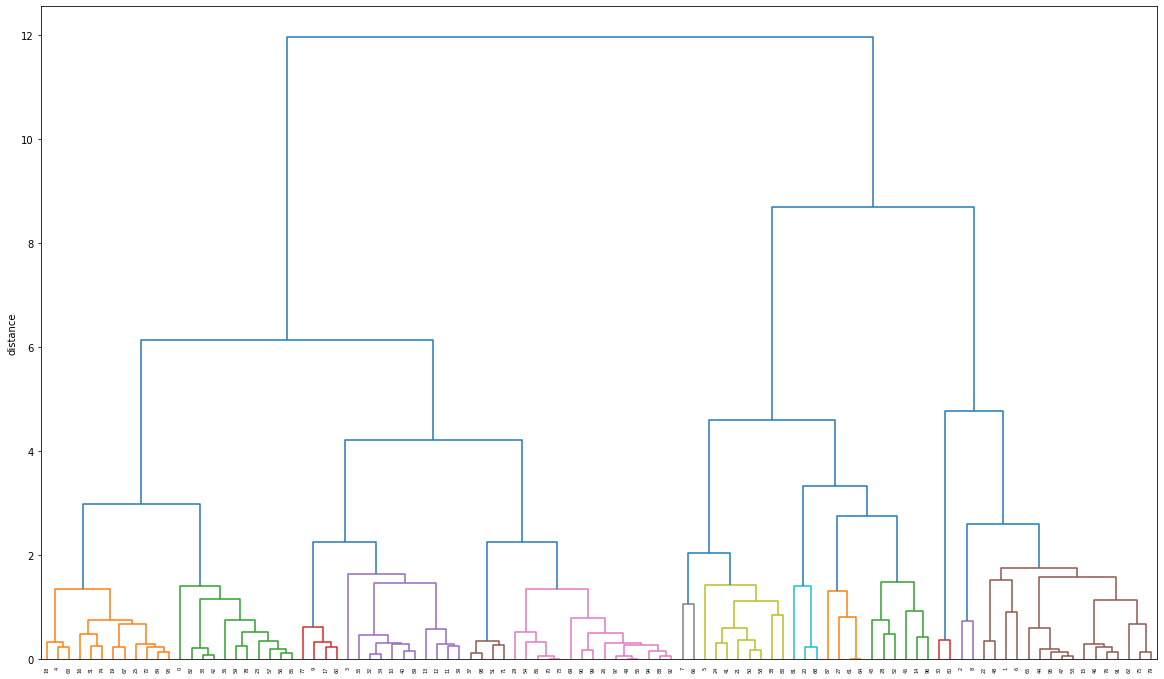

In [128]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=scaled_df[:100].index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

Insights:

- Top 5 job position by pay: Backend Engineer,None,FullStack Engineer,Other,Frontend Engineer
- Top 5 companies by pay: hzxctqovr tmhoxztoo,exatrxnj xzctonbtzno xzaxv ucn rna,ihgnxtzn ntwyzgrgsj xzw egqbtqrj wghugzowgb,sgsg xzaxv rru,xzabvd
- Scalar has more enrollment between 1-5 years of employees.
- 2019 and 2021 is when most of the employees got hikes and their CTC got updated.


Recomendations:
- Scalar should focus on students having 1-5 years experices as the market opportuniy is very high and looking for more competitive pay.
- Scalar should focus also on the low paying job titles as they have enrolled for either placements or knowledge gain. 
- Salaries have increases overtime. Hence its a growing market for some top skills job position such as FullStack Engineer, Backend Engineer and Data Science.
- Top paying companies has everybody's eye. Hence scalar should focus more on students coming and going to these companies.